## Data Analysis of My Music Listening Habits

Dataset: My Last.fm scrobbling data

This is an exploratory data analysis of my music listening habits based on my last.fm scrobbles

In [1]:
#import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec
import seaborn as sns
import calendar
%matplotlib inline

In [2]:
#Load data
scrob = pd.read_csv("./data/last_fm_stats.csv", header=None)
scrob.head()

,0,1,2,3
0,Pretend,Bones in the Soil Rust in the Oil,Legs To Walk Us To Drop Us,07 Jan 2023 00:08
1,Pretend,Bones in the Soil Rust in the Oil,Those Luminous Noises Are God,07 Jan 2023 00:00
2,The Velvet Underground & Nico,The Velvet Underground & Nico,Heroin,06 Jan 2023 19:41
3,Origami Angel,Somewhere City,The Air Up Here,06 Jan 2023 19:34
4,Sun Kil Moon,Ghosts of the Great Highway,Carry Me Ohio,03 Jan 2023 01:49


The dataset does not have a header and uses a numeric index. I will replace these with something that suitably identifies the data.

In [3]:
scrob.rename(columns = {0: 'Artist', 1: 'Album', 2: 'Track', 3: 'Date'}, inplace=True)
scrob.head()

,Artist,Album,Track,Date
0,Pretend,Bones in the Soil Rust in the Oil,Legs To Walk Us To Drop Us,07 Jan 2023 00:08
1,Pretend,Bones in the Soil Rust in the Oil,Those Luminous Noises Are God,07 Jan 2023 00:00
2,The Velvet Underground & Nico,The Velvet Underground & Nico,Heroin,06 Jan 2023 19:41
3,Origami Angel,Somewhere City,The Air Up Here,06 Jan 2023 19:34
4,Sun Kil Moon,Ghosts of the Great Highway,Carry Me Ohio,03 Jan 2023 01:49


I want to look at the music that I listened to by month and year, any scrobbles after 2022 is removed since we're barely into the new year.

In [4]:
#Extract Year and Month from Date
scrob['Date'] = pd.to_datetime(scrob['Date'])
scrob['Year'] = pd.DatetimeIndex(scrob['Date']).year

scrob = scrob[scrob['Year'] < 2023]

scrob.head()

,Artist,Album,Track,Date,Year
22,Childish Gambino,Awaken My Love!,Redbone,2022-12-31 06:42:00,2022
23,MF DOOM,Operation: Doomsday,Doomsday,2022-12-31 06:36:00,2022
24,Johnny Cash,American IV: The Man Comes Around,Hurt,2022-12-30 17:36:00,2022
25,Johnny Cash,American IV: The Man Comes Around,Big Iron,2022-12-30 17:32:00,2022
26,TTNG,Animals Acoustic,Gibbon,2022-12-30 05:17:00,2022


Let's break down the dataset by year.

In [5]:
year_list = list(set(scrob['Year']))

index = 0
years = {year:index for index,year in enumerate(year_list)}

scrob_byYear = []
year_index = {}

for index, year in enumerate(year_list):
    scrob_byYear.append(scrob[scrob['Year'] == year])
    year_index[year] = index

A plot that highlights my top 20 listened to artists by year and my overall top 50.

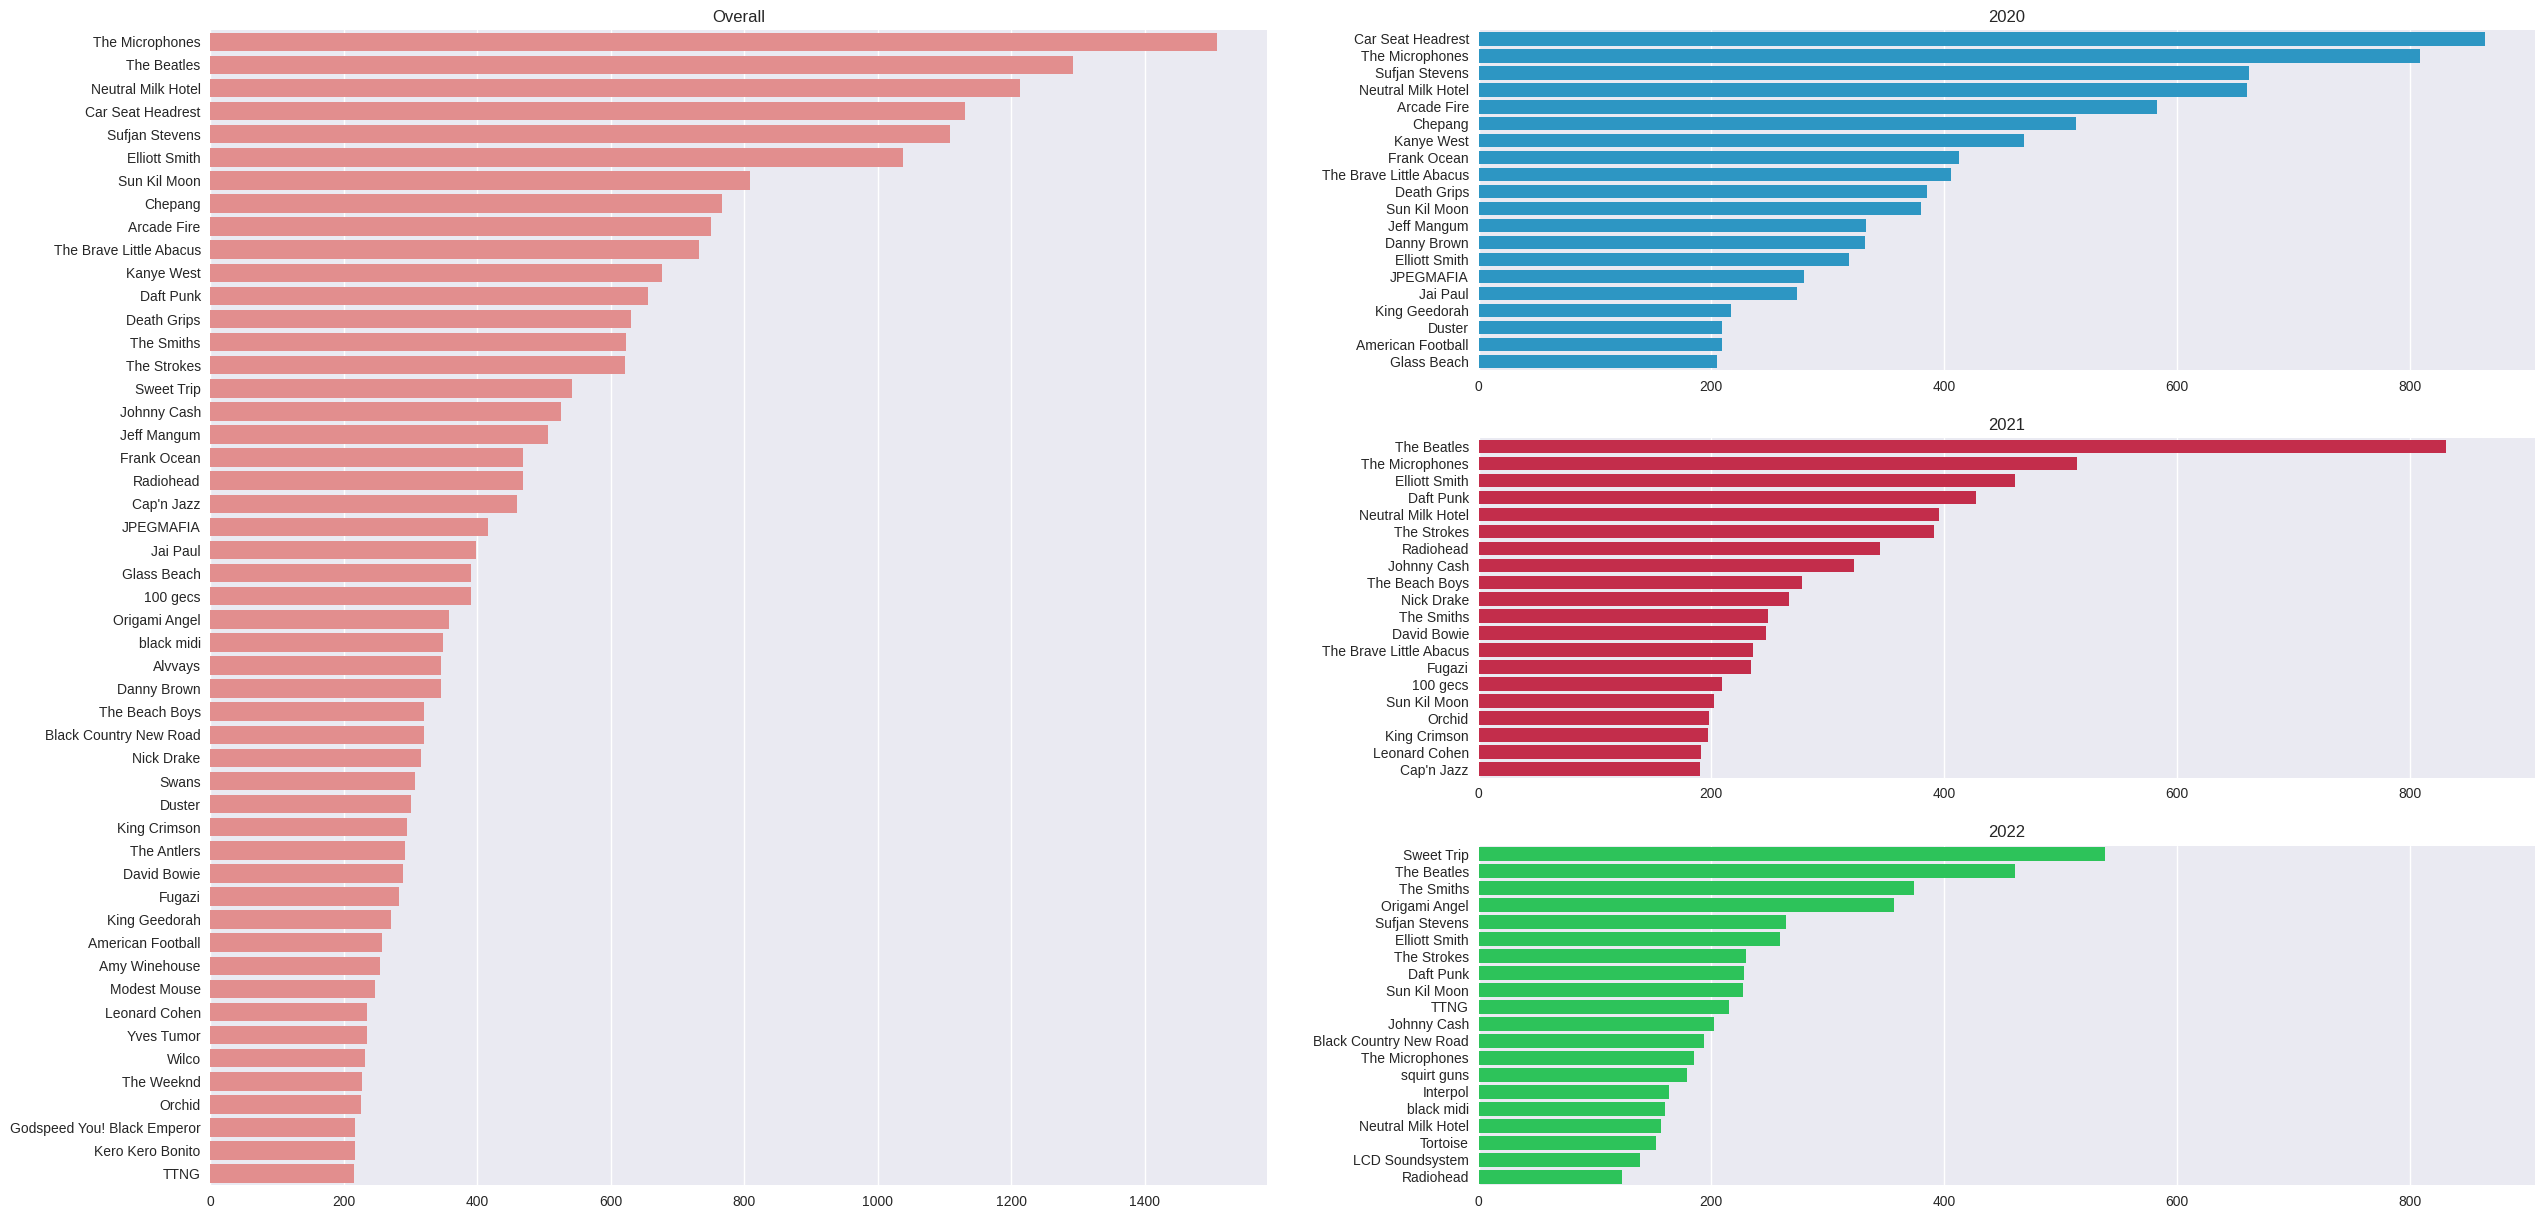

In [6]:
fig = plt.figure(figsize=(30, 15))

#Divide the plot into two columns
gs0 = gridspec.GridSpec(1, 2)
#First column with only 1 plot
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs0[0])
#Second column with 3 rows for the plots
gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])

#Overall Top 50
ax00 = plt.subplot(gs00[0, 0])
top50 = scrob['Artist'].value_counts()[:50]
sns.barplot(x = top50.values, y = top50.index, color = '#f08080')
ax00.set_title('Overall')

color_list = ["#14a0dc", "#dc143c", "#14dc50"]

for year in year_list:
    index = year_index[year]
    if index == 0: ax = plt.subplot(gs01[index, 0])
    else: ax = plt.subplot(gs01[index, 0], sharex=ax)
    top = scrob_byYear[index]['Artist'].value_counts()[:20]
    sns.barplot(x = top.values, y = top.index, color=color_list[index])
    ax.set_title(str(year))

Year-by-year breakdown the scrobbles of my 50 most played artists.

In [7]:
top50_artists = list(top50.index)

top50_yearly = []

for year in year_list:
    year_scrobs = scrob_byYear[year_index[year]]
    top50_yearly.append(year_scrobs.query('Artist in @top50_artists'))

In [8]:
top50_yearly[0]['Artist'].value_counts()

top50_artists_scrobs = pd.DataFrame({'Total': top50})

for year in year_list:
    top50_artists_scrobs = pd.concat((top50_artists_scrobs, top50_yearly[year_index[year]]['Artist'].value_counts().rename(str(year))), axis=1)

top50_artists_scrobs = top50_artists_scrobs.fillna(0).drop(['Total'], axis=1)

<Figure size 1000x1000 with 0 Axes>

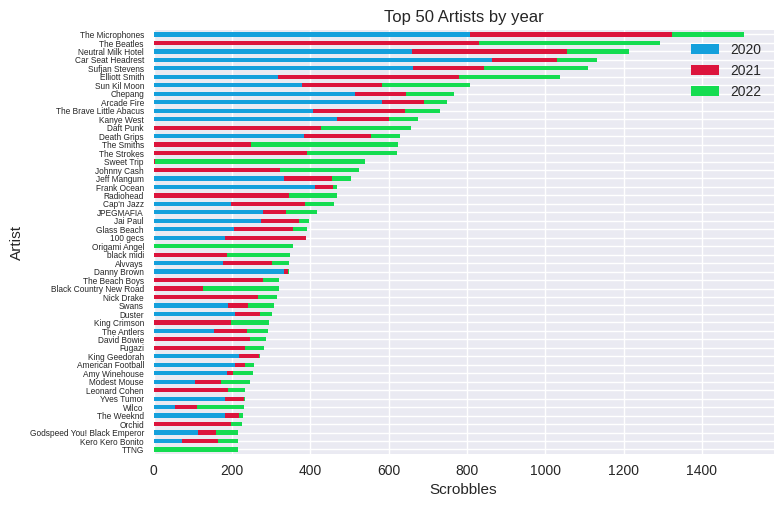

In [9]:
fig = plt.figure(figsize=(10, 10))

top50_artists_scrobs.plot(kind='barh', stacked=True, color=color_list)

plt.xlabel('Scrobbles')
plt.ylabel('Artist')
plt.yticks(fontsize = 6)
plt.gca().invert_yaxis()

plt.title('Top 50 Artists by year')

plt.show()

Breaking down the dataset by month.

In [10]:
monthly = (
    scrob
    .assign(
        month = lambda x: x['Date'].dt.strftime('%b'),
        month_num = lambda x: x['Date'].dt.strftime('%m').astype(int)
    )
    .groupby(['Year', 'month', 'month_num'])
    .apply(lambda x: pd.Series({
        'Scrobbles': len(x['Date'])
    }))
    .reset_index()
    .sort_values(['Year','month_num'])
    .drop('month_num', axis=1)
)

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly['month'] = pd.Categorical(monthly['month'], categories=months, ordered=True)

Two plots highlighting my monthly scrobbles by year.

Text(0.5, 0, 'Month')

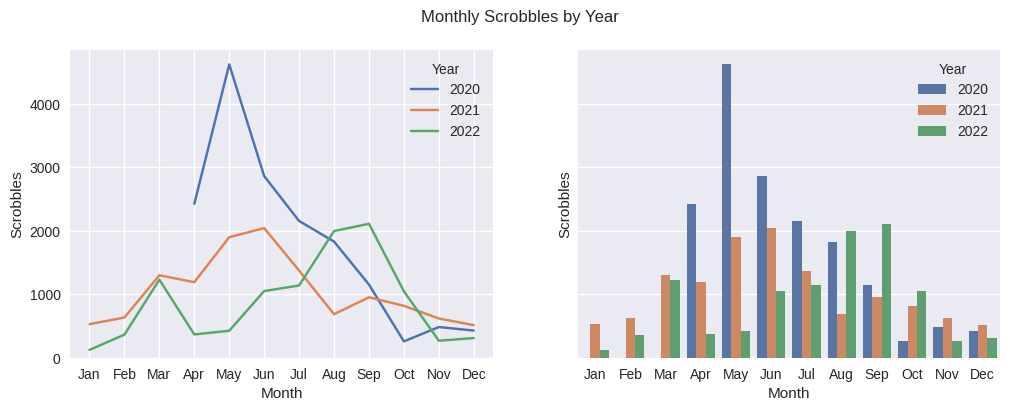

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Monthly Scrobbles by Year')

ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data = monthly, x = 'month', y = 'Scrobbles', hue = 'Year', palette='deep')
ax1.set_xlabel('Month')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data = monthly, x='month', y='Scrobbles', hue='Year', palette='deep')
ax2.set_xlabel('Month')

A plot to highlight the frequency of my monthly scrobbles by year.

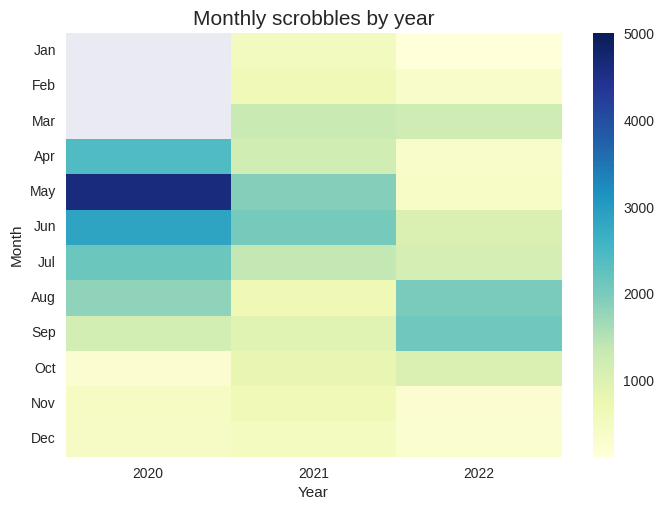

In [13]:
sns.heatmap(monthly.pivot("month", "Year", "Scrobbles"),vmax=5000, cmap="YlGnBu")
plt.title('Monthly scrobbles by year', fontsize = 15)
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()

Let's breakdown the dataset to look at scrobbles by hour.

In [14]:
hourly = (
    scrob
    .assign(
        hour = lambda x: x['Date'].dt.strftime('%H').astype(int),
    )
    .groupby('hour')
    .apply(lambda x: pd.Series({
        'Scrobbles': len(x['Date'])
    }))
    .reset_index()
)

A plot highlighting my most active hours.

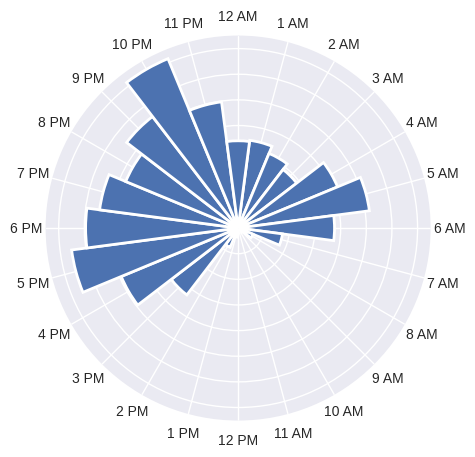

In [15]:
fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111, projection = 'polar')
plt.axis()

lowerLimit = 0
max = hourly['Scrobbles'].max()

heights = hourly['Scrobbles']
width = 2 * np.pi / len(hourly.index)

indexes = list(range(1, len(hourly.index) + 1))
angles = [element * width for element in indexes]

bars = ax.bar(x = angles,
            height = hourly['Scrobbles'],
            width = width,
            linewidth=2,
            edgecolor="white",
            bottom = 0)

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
hour_list = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM',
            '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM',
            '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM',
            '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']
ax.set_xticklabels(hour_list)

plt.setp(ax.get_yticklabels(), visible = False)

plt.show()
